In [1]:
# Common imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Base parameters
n_timesteps = 365  # One year
np.random.seed(42)  # For reproducibility

# Create time index
dates = pd.date_range('2020-01-01', periods=n_timesteps, freq='D')
time_numeric = np.arange(n_timesteps)

# Calendar features (common across all datasets)
day_of_week = dates.dayofweek  # 0=Monday, 6=Sunday
is_weekend = (day_of_week >= 5).astype(int)
month = dates.month
day_of_week_sin = np.sin(2 * np.pi * day_of_week / 7)
day_of_week_cos = np.cos(2 * np.pi * day_of_week / 7)
day_of_month_sin = np.sin(2 * np.pi * dates.day / 30)
day_of_month_cos = np.cos(2 * np.pi * dates.day / 30)
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# Common holidays
is_holiday = np.zeros(n_timesteps)
major_holidays = [0, 31, 59, 120, 185, 245, 335, 358]  # Approx: Jan 1, Feb 1, Mar 1, May 1, Jul 5, Sep 2, Dec 1, Dec 24
for day in major_holidays:
    if day < n_timesteps:
        is_holiday[day] = 1

random_holidays = np.random.choice(range(n_timesteps), size=10, replace=False)
is_holiday[random_holidays] = 1

# Function to get temperature with seasonal pattern
def get_temperature(amplitude=10, phase_shift=np.pi, noise_scale=2):
    temp_seasonal = 15 + amplitude * np.sin(2 * np.pi * time_numeric / 365 + phase_shift)
    temp_noise = np.random.randn(n_timesteps) * noise_scale
    return temp_seasonal + temp_noise

# Function to get promotion periods
def get_promotions(num_promotions=3, avg_duration=15):
    is_promotion = np.zeros(n_timesteps)
    promo_starts = np.random.choice(range(n_timesteps - avg_duration), size=num_promotions, replace=False)
    
    for start in promo_starts:
        duration = int(avg_duration * (0.8 + 0.4 * np.random.random()))  # Variable duration
        end = min(start + duration, n_timesteps)
        is_promotion[start:end] = 1
    
    return is_promotion

Original dataset:


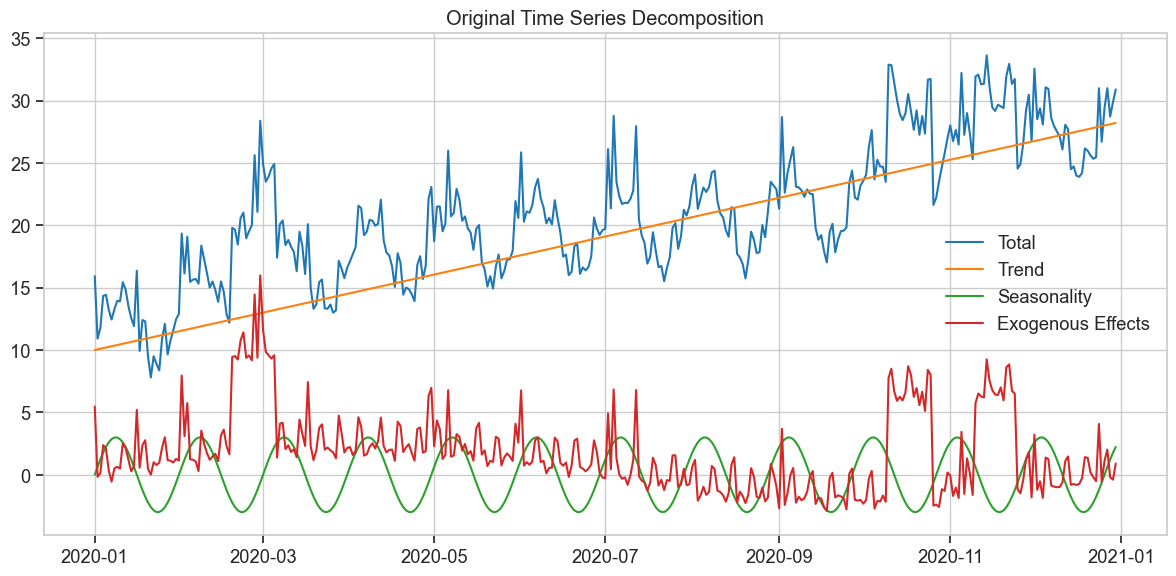

In [2]:
# Cell 1: Original Dataset (for reference)

# Parameters
trend_slope = 0.05  # Upward trend
seasonal_amplitude = 3
seasonal_period = 30  # Monthly seasonality
noise_std = 0.3

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi)
is_promotion = get_promotions(num_promotions=3, avg_duration=15)

# Exogenous effects
temp_effect = -0.2 * (temperature - 15)  # Normalized effect
weekend_effect = 2.0 * is_weekend
holiday_effect = 5.0 * is_holiday
promotion_effect = 8.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_original = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Original dataset:")
df_original.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_original.index, df_original['value'], label='Total')
plt.plot(df_original.index, df_original['trend'], label='Trend')
plt.plot(df_original.index, df_original['seasonality'], label='Seasonality')
plt.plot(df_original.index, df_original['exog_effects'], label='Exogenous Effects')

plt.title('Original Time Series Decomposition')
plt.legend()
plt.tight_layout()
plt.show()

Strong trend dataset:


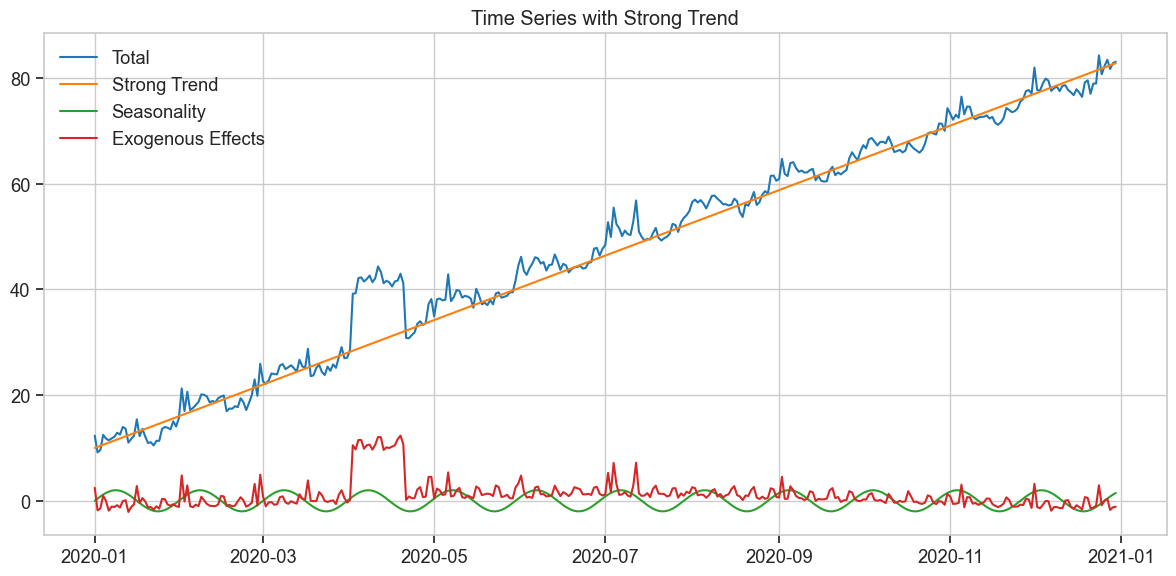

In [3]:
# Cell 2: Dataset with Strong Trend

# Parameters - strong upward trend
trend_slope = 0.2  # Much steeper trend (4x stronger)
seasonal_amplitude = 2  # Slightly weaker seasonality
seasonal_period = 30
noise_std = 0.4  # Slightly more noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=8, phase_shift=np.pi/2)  # Different temp pattern
is_promotion = get_promotions(num_promotions=2, avg_duration=20)  # Fewer, longer promotions

# Exogenous effects - different coefficients
temp_effect = -0.15 * (temperature - 15)
weekend_effect = 1.5 * is_weekend  # Reduced weekend effect
holiday_effect = 4.0 * is_holiday  # Reduced holiday effect
promotion_effect = 10.0 * is_promotion  # Stronger promotion effect

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_strong_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Strong trend dataset:")
df_strong_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_strong_trend.index, df_strong_trend['value'], label='Total')
plt.plot(df_strong_trend.index, df_strong_trend['trend'], label='Strong Trend')
plt.plot(df_strong_trend.index, df_strong_trend['seasonality'], label='Seasonality')
plt.plot(df_strong_trend.index, df_strong_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Strong Trend')
plt.legend()
plt.tight_layout()
plt.show()

Strong seasonality dataset:


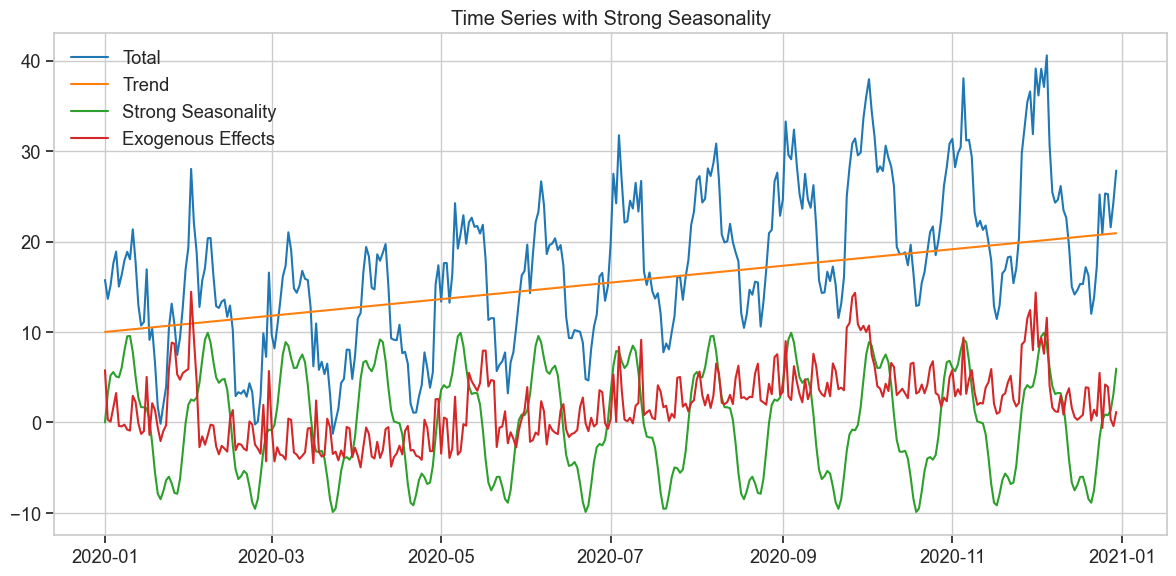

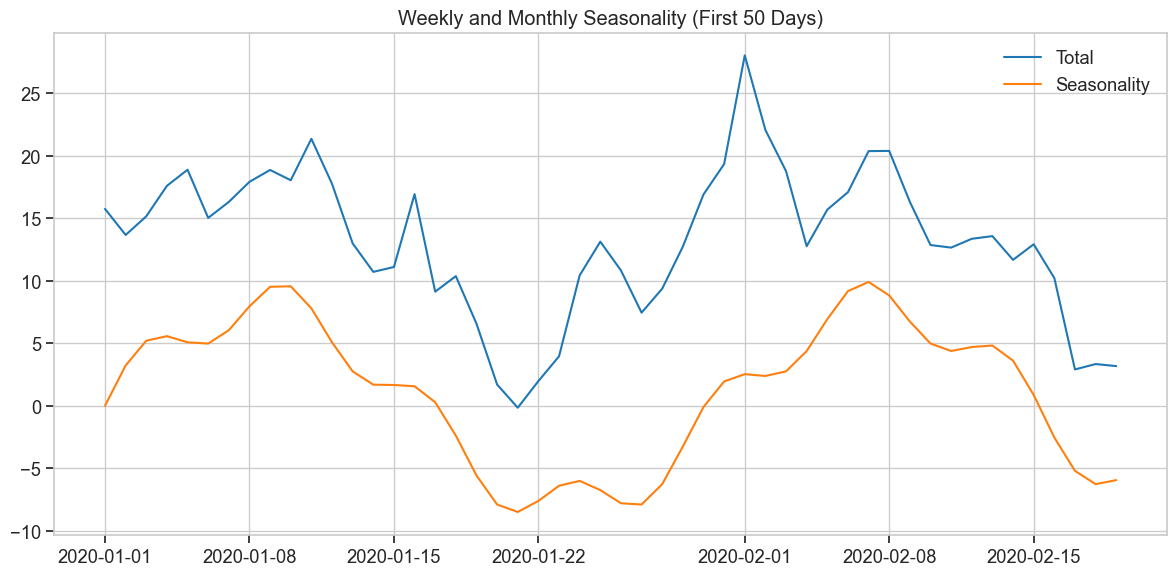

In [4]:
# Cell 3: Dataset with Strong Seasonality

# Parameters - strong seasonality
trend_slope = 0.03  # Weaker trend
seasonal_amplitude = 8  # Much stronger seasonality
seasonal_period = 30
noise_std = 0.5

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Add second seasonality component (weekly)
weekly_seasonality = 2 * np.sin(2 * np.pi * time_numeric / 7)
seasonality += weekly_seasonality

# Create exogenous variables
temperature = get_temperature(amplitude=12, phase_shift=0)  # Different temp pattern
is_promotion = get_promotions(num_promotions=4, avg_duration=10)  # More promotions, shorter duration

# Exogenous effects
temp_effect = -0.3 * (temperature - 15)  # Stronger temperature effect
weekend_effect = 3.0 * is_weekend  # Stronger weekend effect 
holiday_effect = 6.0 * is_holiday  # Stronger holiday effect
promotion_effect = 7.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_strong_seasonality = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Strong seasonality dataset:")
df_strong_seasonality.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_strong_seasonality.index, df_strong_seasonality['value'], label='Total')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['trend'], label='Trend')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['seasonality'], label='Strong Seasonality')
plt.plot(df_strong_seasonality.index, df_strong_seasonality['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Strong Seasonality')
plt.legend()
plt.tight_layout()
plt.show()

# Zoom in to see weekly patterns
plt.figure(figsize=(12, 6))
plt.plot(df_strong_seasonality.index[0:50], df_strong_seasonality['value'][0:50], label='Total')
plt.plot(df_strong_seasonality.index[0:50], df_strong_seasonality['seasonality'][0:50], label='Seasonality')

plt.title('Weekly and Monthly Seasonality (First 50 Days)')
plt.legend()
plt.tight_layout()
plt.show()

Changing trend dataset:


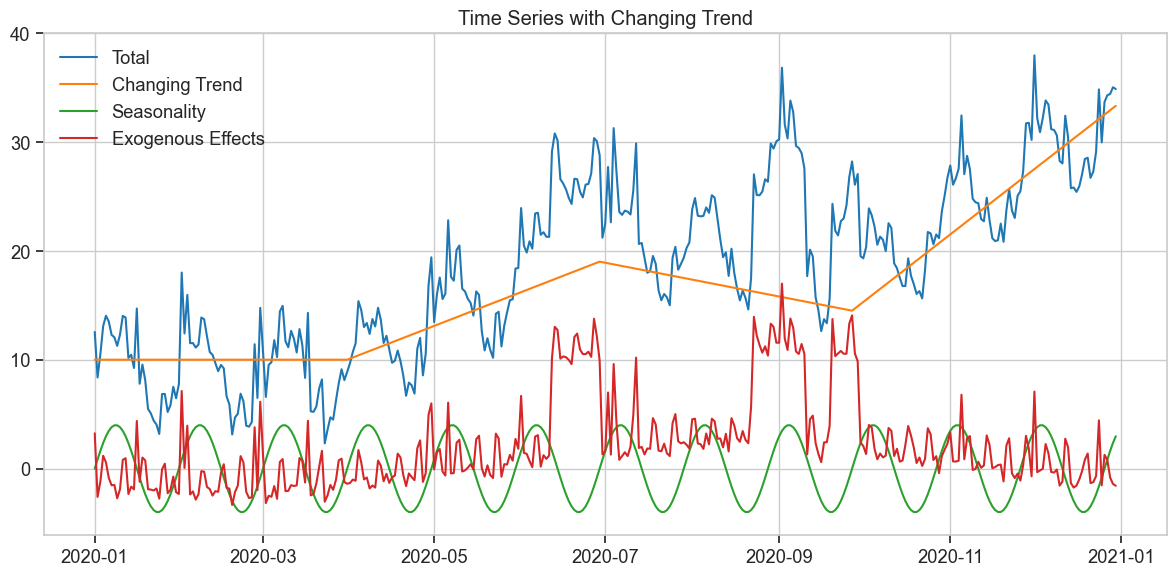

In [5]:
# Cell 4: Dataset with Changing Trend (regime change)

# Parameters
seasonal_amplitude = 4
seasonal_period = 30
noise_std = 0.4

# Generate piece-wise trend with change points
trend = np.zeros(n_timesteps)
# First segment: Flat
trend[0:90] = 10
# Second segment: Upward trend
trend[90:180] = 10 + 0.1 * np.arange(90)
# Third segment: Downward trend
trend[180:270] = 19 - 0.05 * np.arange(90)
# Fourth segment: Steep upward trend
trend[270:] = 14.5 + 0.2 * np.arange(len(trend[270:]))

# Seasonality
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=9, phase_shift=np.pi/4)
is_promotion = get_promotions(num_promotions=5, avg_duration=12)

# Exogenous effects
temp_effect = -0.25 * (temperature - 15)
weekend_effect = 2.5 * is_weekend
holiday_effect = 6.0 * is_holiday
promotion_effect = 9.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_changing_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Changing trend dataset:")
df_changing_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_changing_trend.index, df_changing_trend['value'], label='Total')
plt.plot(df_changing_trend.index, df_changing_trend['trend'], label='Changing Trend')
plt.plot(df_changing_trend.index, df_changing_trend['seasonality'], label='Seasonality')
plt.plot(df_changing_trend.index, df_changing_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Changing Trend')
plt.legend()
plt.tight_layout()
plt.show()

Exogenous-dominant dataset:


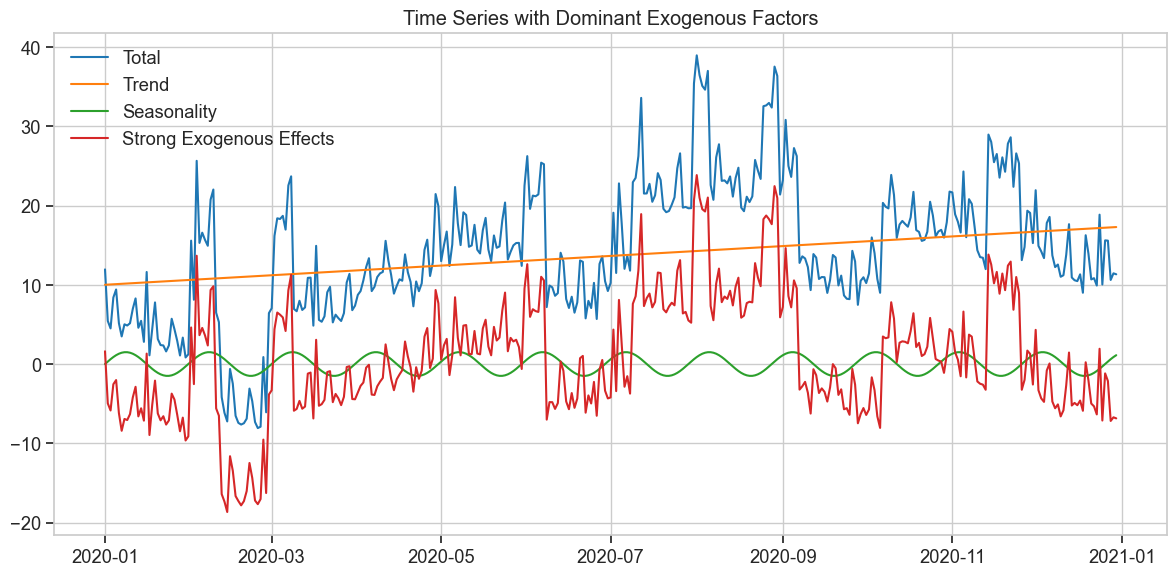

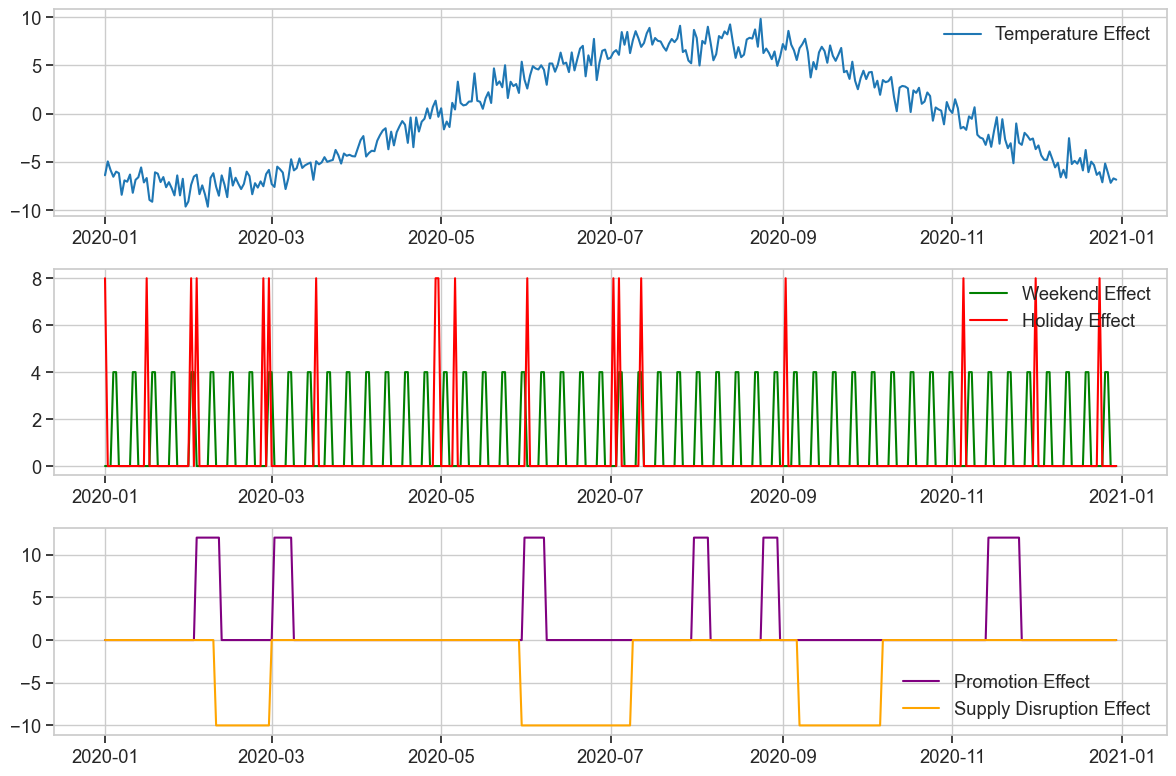

In [6]:
# Cell 5: Dataset with Dominant Exogenous Factors

# Parameters - weak trend and seasonality, strong exogenous factors
trend_slope = 0.02  # Very weak trend
seasonal_amplitude = 1.5  # Weak seasonality
seasonal_period = 30
noise_std = 0.3

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables with stronger effects
temperature = get_temperature(amplitude=15, phase_shift=np.pi/3)  # More extreme temperature swings
is_promotion = get_promotions(num_promotions=8, avg_duration=8)  # More frequent, shorter promotions

# Create additional exogenous factor: supply chain disruptions
supply_disruption = np.zeros(n_timesteps)
disruption_periods = [(40, 60), (150, 190), (250, 280)]
for start, end in disruption_periods:
    supply_disruption[start:end] = 1

# Exogenous effects - much stronger
temp_effect = -0.5 * (temperature - 15)  # Stronger temperature effect
weekend_effect = 4.0 * is_weekend  # Stronger weekend effect
holiday_effect = 8.0 * is_holiday  # Stronger holiday effect
promotion_effect = 12.0 * is_promotion  # Stronger promotion effect
supply_effect = -10.0 * supply_disruption  # Strong negative effect from supply disruptions

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect + supply_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_exogenous_dominant = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'supply_disruption': supply_disruption,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Exogenous-dominant dataset:")
df_exogenous_dominant.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['value'], label='Total')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['trend'], label='Trend')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['seasonality'], label='Seasonality')
plt.plot(df_exogenous_dominant.index, df_exogenous_dominant['exog_effects'], label='Strong Exogenous Effects')

plt.title('Time Series with Dominant Exogenous Factors')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize individual exogenous factors
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df_exogenous_dominant.index, temp_effect, label='Temperature Effect')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_exogenous_dominant.index, weekend_effect, color='green', label='Weekend Effect')
plt.plot(df_exogenous_dominant.index, holiday_effect, color='red', label='Holiday Effect')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_exogenous_dominant.index, promotion_effect, color='purple', label='Promotion Effect')
plt.plot(df_exogenous_dominant.index, supply_effect, color='orange', label='Supply Disruption Effect')
plt.legend()

plt.tight_layout()
plt.show()

High noise dataset:


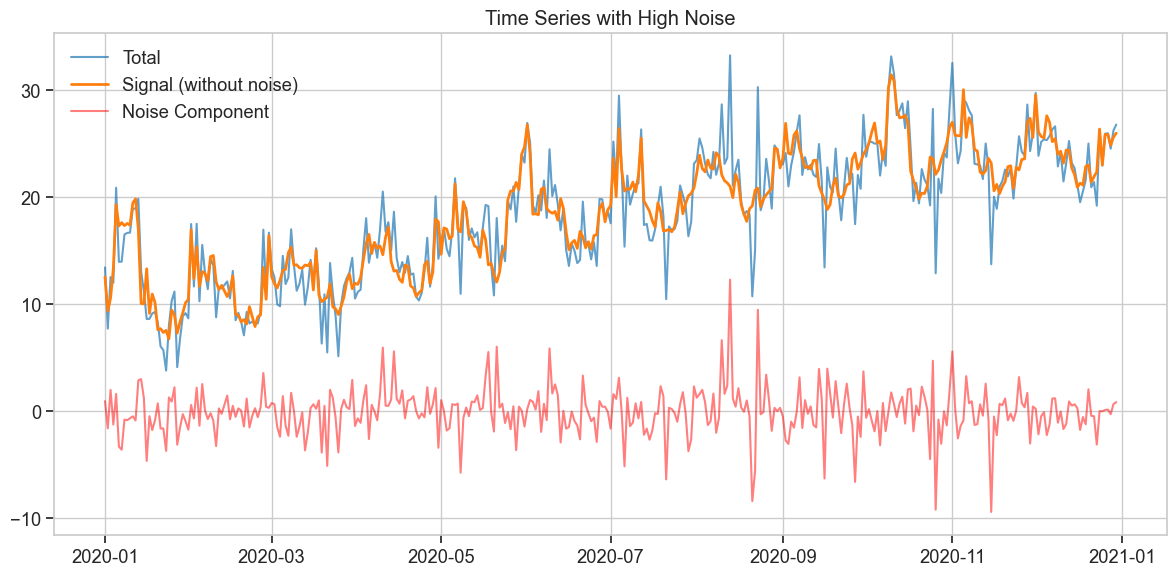

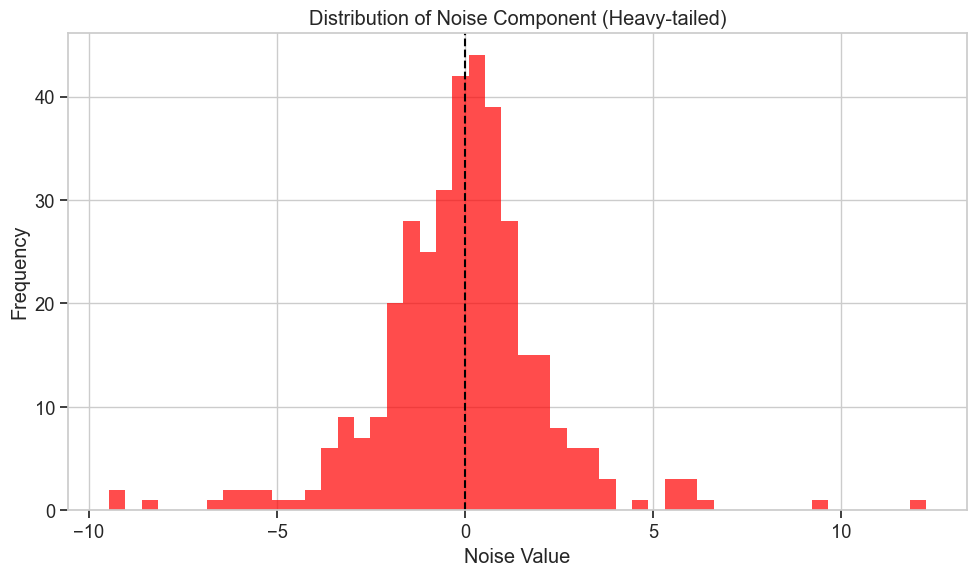

In [7]:
# Cell 6: Dataset with High Noise

# Parameters - high noise with heavy tails
trend_slope = 0.04  # Small trend
seasonal_amplitude = 2.5  # Moderate seasonality
seasonal_period = 30
noise_std = 1.5  # Much higher noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=8, phase_shift=np.pi/6)
is_promotion = get_promotions(num_promotions=3, avg_duration=10)

# Exogenous effects - moderate
temp_effect = -0.2 * (temperature - 15)
weekend_effect = 2.0 * is_weekend
holiday_effect = 4.0 * is_holiday
promotion_effect = 6.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# Generate heavy-tailed noise (Student's t-distribution with df=3)
np.random.seed(42)  # Reset seed for consistency
noise = np.random.standard_t(df=3, size=n_timesteps) * noise_std

# Add some outliers
outlier_positions = np.random.choice(range(n_timesteps), size=5, replace=False)
outlier_magnitudes = np.random.choice([-1, 1], size=5) * np.random.uniform(5, 10, size=5)
for pos, mag in zip(outlier_positions, outlier_magnitudes):
    noise[pos] += mag

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_high_noise = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("High noise dataset:")
df_high_noise.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_high_noise.index, df_high_noise['value'], label='Total', alpha=0.7)
plt.plot(df_high_noise.index, df_high_noise['trend'] + df_high_noise['seasonality'] + df_high_noise['exog_effects'], 
         label='Signal (without noise)', linewidth=2)
plt.plot(df_high_noise.index, df_high_noise['noise'], label='Noise Component', alpha=0.5, color='red')

plt.title('Time Series with High Noise')
plt.legend()
plt.tight_layout()
plt.show()

# Histogram of noise to show heavy tails
plt.figure(figsize=(10, 6))
plt.hist(df_high_noise['noise'], bins=50, alpha=0.7, color='red')
plt.title('Distribution of Noise Component (Heavy-tailed)')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Noise Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Geometric Brownian Motion dataset:


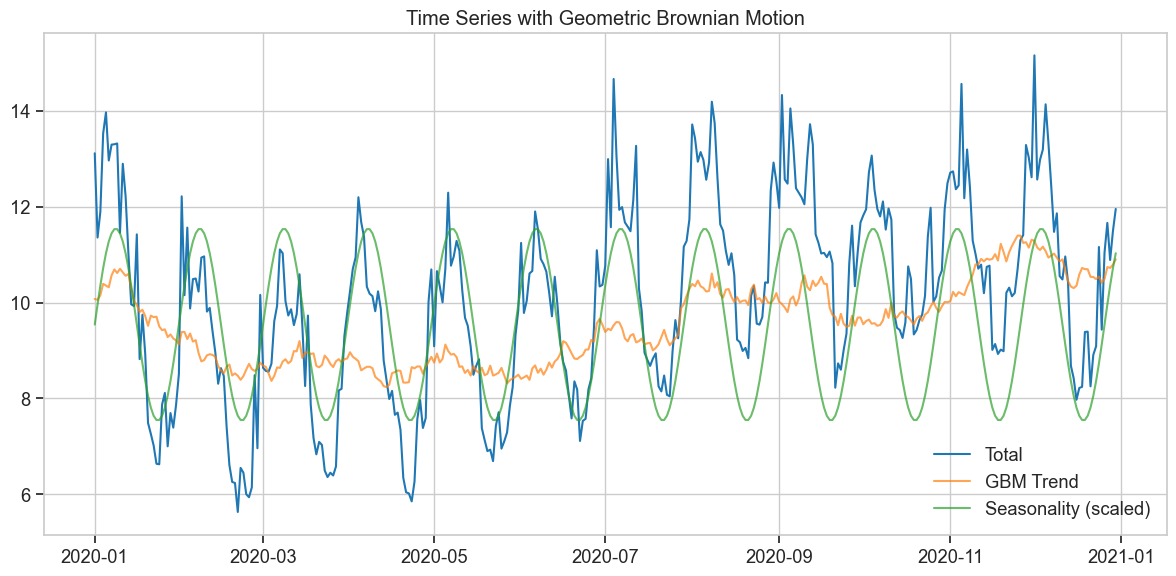

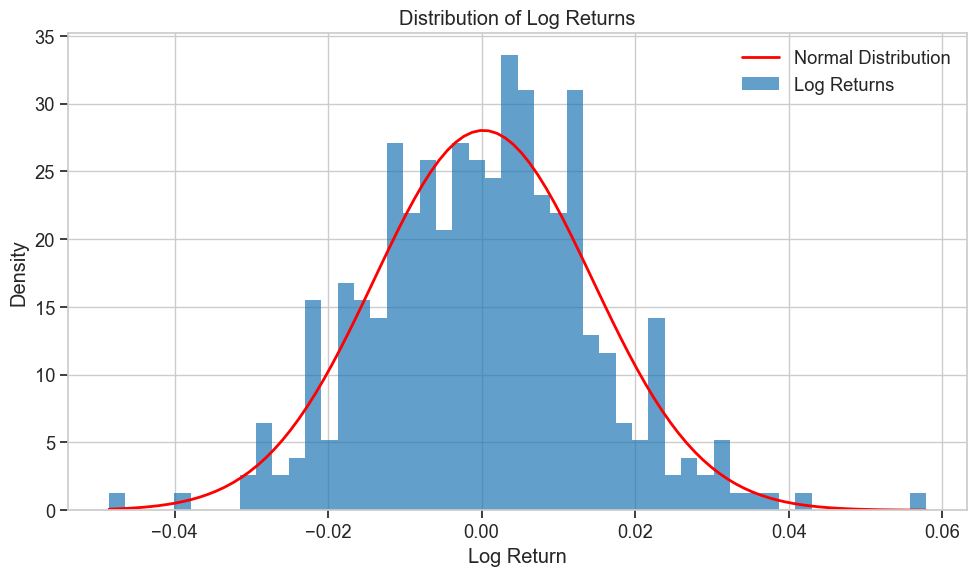

In [8]:
# Cell 7: Dataset with Geometric Brownian Motion (GBM)

# Parameters for Geometric Brownian Motion
mu = 0.0002  # Drift (daily)
sigma = 0.015  # Volatility (daily)
S0 = 10  # Initial value
seasonal_amplitude = 2  # Still add some seasonality
seasonal_period = 30

# Generate GBM path
np.random.seed(42)  # Reset for consistency
dt = 1  # Daily time steps
brownian_increments = np.random.normal(0, np.sqrt(dt), n_timesteps)
W = np.cumsum(brownian_increments)  # Brownian motion path

# GBM formula: S(t) = S0 * exp((mu - 0.5*sigma^2)*t + sigma*W(t))
time = np.arange(n_timesteps) * dt
drift_term = (mu - 0.5 * sigma**2) * time
diffusion_term = sigma * W
trend = S0 * np.exp(drift_term + diffusion_term)

# Add seasonality
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables with moderate effects
temperature = get_temperature(amplitude=8, phase_shift=np.pi/4)
is_promotion = get_promotions(num_promotions=4, avg_duration=10)

# Exogenous effects - moderate, with multiplicative effect
temp_effect = -0.01 * (temperature - 15) * trend  # Multiplicative effect (proportion of trend)
weekend_effect = 0.1 * is_weekend * trend  # Weekends increase by 10%
holiday_effect = 0.2 * is_holiday * trend  # Holidays increase by 20%
promotion_effect = 0.15 * is_promotion * trend  # Promotions increase by 15%

# Combine effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# No additional noise term - GBM already has stochasticity
values = trend + seasonality + exog_effects

# Create DataFrame
df_gbm = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos,
    'gbm_drift': drift_term,
    'gbm_diffusion': diffusion_term
}, index=dates)

# Display the first few rows
print("Geometric Brownian Motion dataset:")
df_gbm.head()

# Log returns calculation
df_gbm['log_returns'] = np.log(df_gbm['trend'] / df_gbm['trend'].shift(1)).fillna(0)

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_gbm.index, df_gbm['value'], label='Total', linewidth=1.5)
plt.plot(df_gbm.index, df_gbm['trend'], label='GBM Trend', alpha=0.7)
plt.plot(df_gbm.index, df_gbm['seasonality'] + df_gbm['trend'].mean(), label='Seasonality (scaled)', alpha=0.7)

plt.title('Time Series with Geometric Brownian Motion')
plt.legend()
plt.tight_layout()
plt.show()

# Look at log returns (should be normally distributed)
plt.figure(figsize=(10, 6))
plt.hist(df_gbm['log_returns'][1:], bins=50, alpha=0.7, density=True)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Density')

# Overlay a normal distribution for comparison
x = np.linspace(min(df_gbm['log_returns'][1:]), max(df_gbm['log_returns'][1:]), 100)
plt.plot(x, norm.pdf(x, df_gbm['log_returns'][1:].mean(), df_gbm['log_returns'][1:].std()), 
         linewidth=2, color='red')
plt.legend(['Normal Distribution', 'Log Returns'])
plt.tight_layout()
plt.show()

Dataset with seasonal heteroskedasticity:


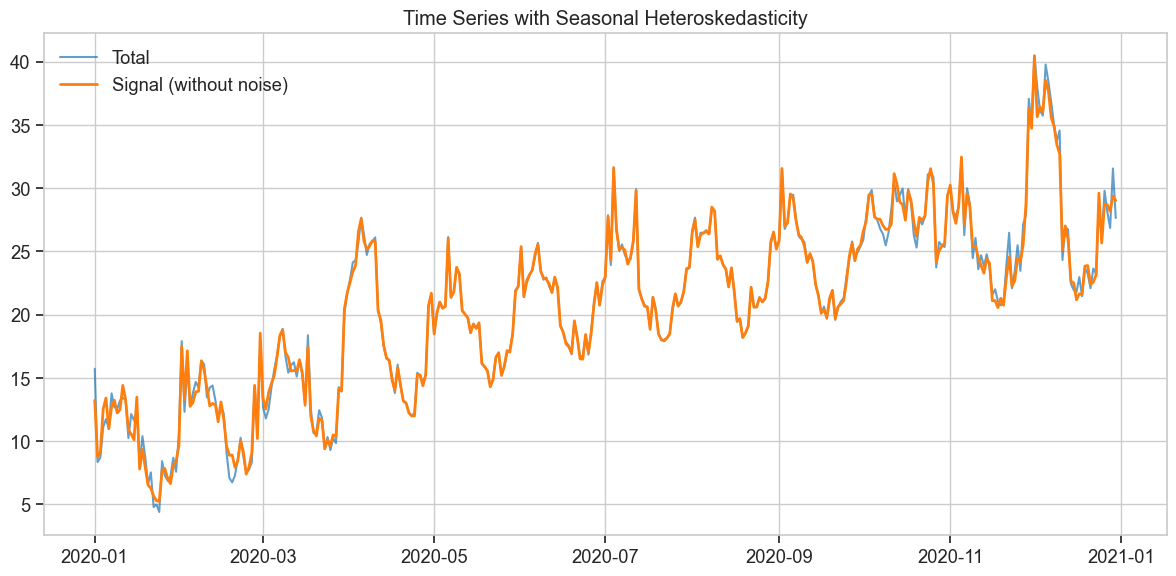

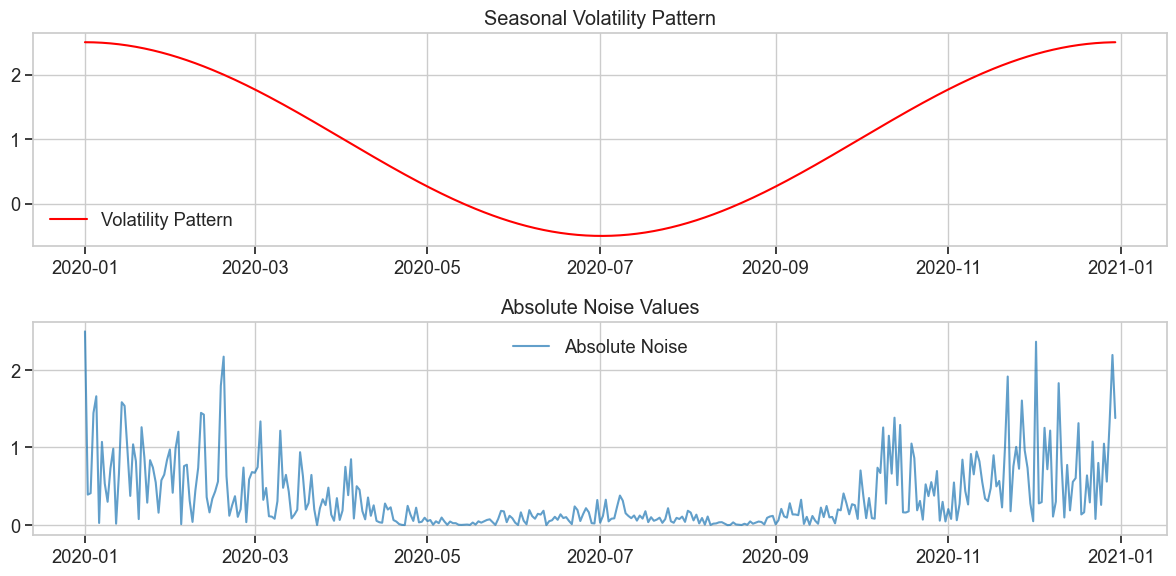

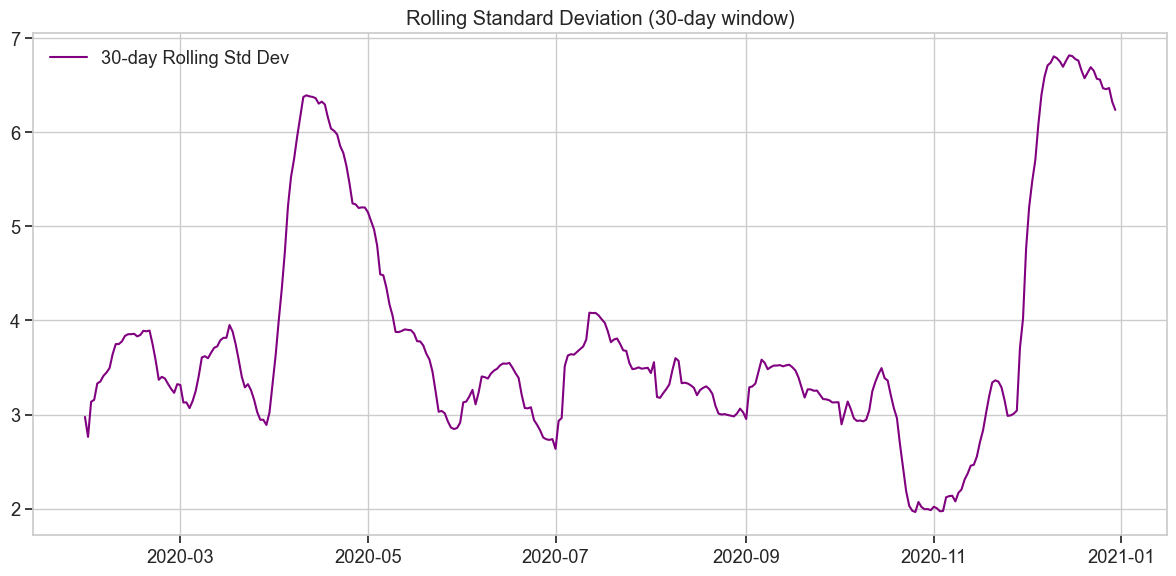

In [9]:
# Cell 8: Dataset with Seasonal Heteroskedasticity (variance changes with seasons)

# Parameters
trend_slope = 0.05
seasonal_amplitude = 4
seasonal_period = 30
base_noise_std = 0.4  # Base level of noise

# Generate base components
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi/2)
is_promotion = get_promotions(num_promotions=3, avg_duration=15)

# Exogenous effects
temp_effect = -0.2 * (temperature - 15)
weekend_effect = 2.0 * is_weekend
holiday_effect = 5.0 * is_holiday
promotion_effect = 7.0 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect

# Create seasonal volatility (higher in winter, lower in summer)
# Higher variance in Q1 and Q4, lower in Q2 and Q3
seasonal_volatility = 1.0 + 1.5 * np.cos(2 * np.pi * time_numeric / 365)  # Higher in winter
noise = np.random.randn(n_timesteps) * base_noise_std * seasonal_volatility

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_heteroskedastic = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'seasonal_volatility': seasonal_volatility,  # Store the volatility pattern
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Dataset with seasonal heteroskedasticity:")
df_heteroskedastic.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_heteroskedastic.index, df_heteroskedastic['value'], label='Total', alpha=0.7)
plt.plot(df_heteroskedastic.index, df_heteroskedastic['trend'] + df_heteroskedastic['seasonality'] + df_heteroskedastic['exog_effects'],
         label='Signal (without noise)', linewidth=2)

plt.title('Time Series with Seasonal Heteroskedasticity')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize the seasonal volatility pattern
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_heteroskedastic.index, df_heteroskedastic['seasonal_volatility'], label='Volatility Pattern', color='red')
plt.title('Seasonal Volatility Pattern')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_heteroskedastic.index, abs(df_heteroskedastic['noise']), label='Absolute Noise', alpha=0.7)
plt.title('Absolute Noise Values')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate rolling window standard deviation to show changing volatility
rolling_std = df_heteroskedastic['value'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df_heteroskedastic.index, rolling_std, label='30-day Rolling Std Dev', color='purple')
plt.title('Rolling Standard Deviation (30-day window)')
plt.legend()
plt.tight_layout()
plt.show()

Multiple regimes dataset:


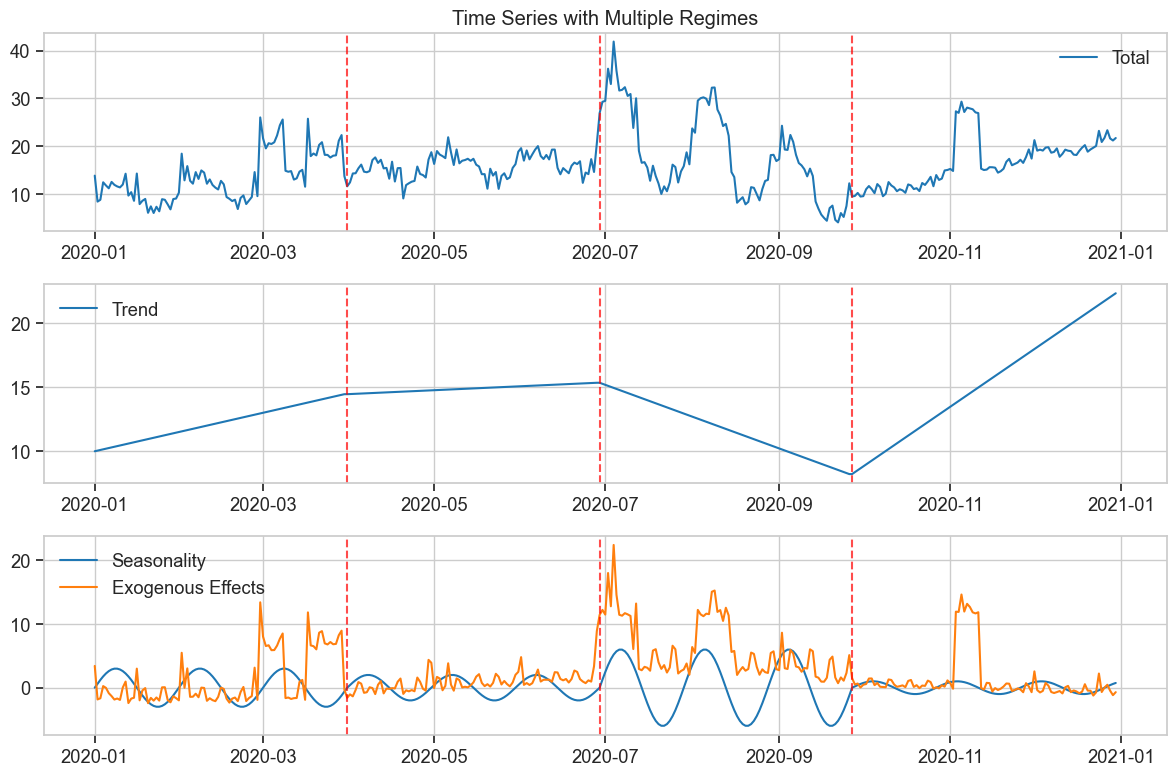

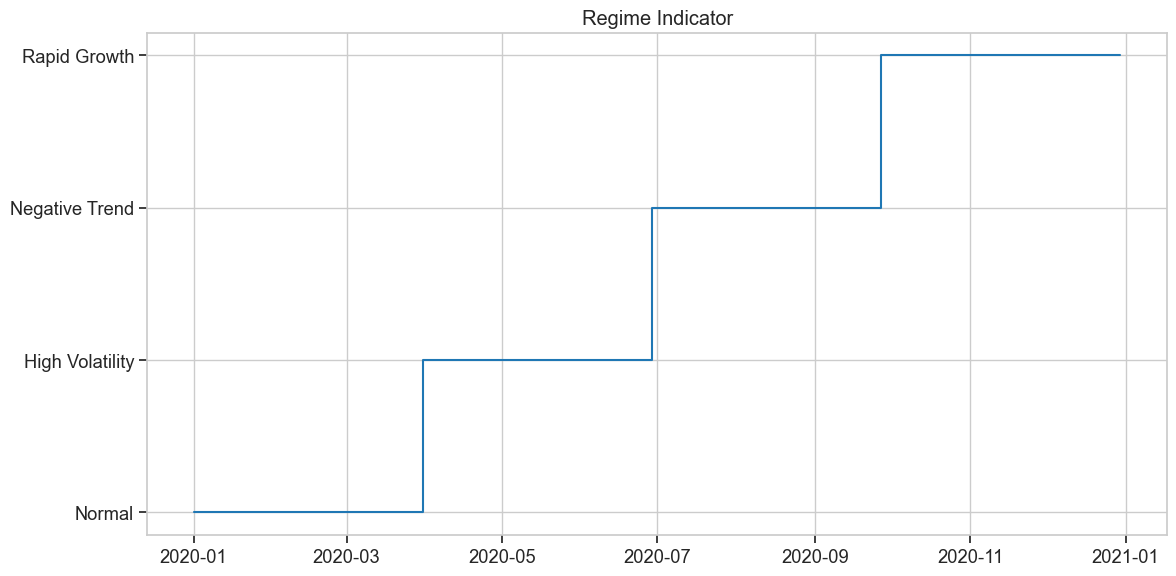

In [10]:
# Cell 9: Dataset with Multiple Regimes and Structural Breaks

# Parameters
noise_std = 0.5

# Define regimes
n_regimes = 4
regime_lengths = [90, 90, 90, 95]  # Adding up to 365 days
regime_boundaries = np.cumsum(regime_lengths)
regime_boundaries = np.insert(regime_boundaries, 0, 0)

# Set different parameters for each regime
regime_params = {
    # regime 0: normal
    0: {
        'trend_slope': 0.05,
        'seasonal_amplitude': 3,
        'seasonal_period': 30,
        'temp_effect_coef': -0.2,
        'weekend_effect_coef': 2.0,
        'holiday_effect_coef': 5.0,
        'promotion_effect_coef': 8.0,
    },
    # regime 1: high volatility with weak trend
    1: {
        'trend_slope': 0.01,
        'seasonal_amplitude': 2,
        'seasonal_period': 30,
        'temp_effect_coef': -0.15,
        'weekend_effect_coef': 1.5,
        'holiday_effect_coef': 4.0,
        'promotion_effect_coef': 6.0,
        'volatility_multiplier': 3.0,  # Higher volatility
    },
    # regime 2: strong seasonality with negative trend
    2: {
        'trend_slope': -0.08,
        'seasonal_amplitude': 6,
        'seasonal_period': 30,
        'temp_effect_coef': -0.3,
        'weekend_effect_coef': 3.0,
        'holiday_effect_coef': 7.0,
        'promotion_effect_coef': 9.0,
    },
    # regime 3: rapid growth with diminished seasonality
    3: {
        'trend_slope': 0.15,
        'seasonal_amplitude': 1,
        'seasonal_period': 30,
        'temp_effect_coef': -0.1,
        'weekend_effect_coef': 1.0,
        'holiday_effect_coef': 3.0,
        'promotion_effect_coef': 12.0,
    }
}

# Initialize arrays for components
trend = np.zeros(n_timesteps)
seasonality = np.zeros(n_timesteps)
temp_effect = np.zeros(n_timesteps)
weekend_effect = np.zeros(n_timesteps)
holiday_effect = np.zeros(n_timesteps)
promotion_effect = np.zeros(n_timesteps)
noise = np.zeros(n_timesteps)
regime_indicator = np.zeros(n_timesteps)

# Create exogenous variables
temperature = get_temperature(amplitude=10, phase_shift=np.pi/3)
is_promotion = get_promotions(num_promotions=5, avg_duration=12)

# Fill components by regime
for regime in range(n_regimes):
    start_idx = regime_boundaries[regime]
    end_idx = regime_boundaries[regime + 1]
    regime_length = end_idx - start_idx
    local_time = np.arange(regime_length)
    
    # Get parameters for this regime
    params = regime_params[regime]
    
    # Set components for this regime
    # Trend (with smooth transition at regime boundaries)
    if regime == 0:
        base_level = 10
    else:
        # Use last value from previous regime as starting point
        base_level = trend[start_idx - 1]
    
    trend[start_idx:end_idx] = base_level + params['trend_slope'] * local_time
    
    # Seasonality
    seasonality[start_idx:end_idx] = params['seasonal_amplitude'] * \
                                   np.sin(2 * np.pi * local_time / params['seasonal_period'])
    
    # Exogenous effects with regime-specific coefficients
    temp_effect[start_idx:end_idx] = params['temp_effect_coef'] * (temperature[start_idx:end_idx] - 15)
    weekend_effect[start_idx:end_idx] = params['weekend_effect_coef'] * is_weekend[start_idx:end_idx]
    holiday_effect[start_idx:end_idx] = params['holiday_effect_coef'] * is_holiday[start_idx:end_idx]
    promotion_effect[start_idx:end_idx] = params['promotion_effect_coef'] * is_promotion[start_idx:end_idx]
    
    # Noise (potentially with different volatility by regime)
    vol_multiplier = params.get('volatility_multiplier', 1.0)
    noise[start_idx:end_idx] = np.random.randn(regime_length) * noise_std * vol_multiplier
    
    # Mark the regime
    regime_indicator[start_idx:end_idx] = regime

# Combine effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_regimes = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'regime': regime_indicator,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
print("Multiple regimes dataset:")
df_regimes.head()

# Quick visualization
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df_regimes.index, df_regimes['value'], label='Total')
# Add vertical lines at regime boundaries
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.title('Time Series with Multiple Regimes')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_regimes.index, df_regimes['trend'], label='Trend')
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_regimes.index, df_regimes['seasonality'], label='Seasonality')
plt.plot(df_regimes.index, df_regimes['exog_effects'], label='Exogenous Effects')
for boundary in regime_boundaries[1:-1]:
    plt.axvline(x=dates[boundary], color='red', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the different regimes
plt.figure(figsize=(12, 6))
plt.step(df_regimes.index, df_regimes['regime'], where='post')
plt.title('Regime Indicator')
plt.yticks([0, 1, 2, 3], ['Normal', 'High Volatility', 'Negative Trend', 'Rapid Growth'])
plt.tight_layout()
plt.show()

Negative trend dataset:


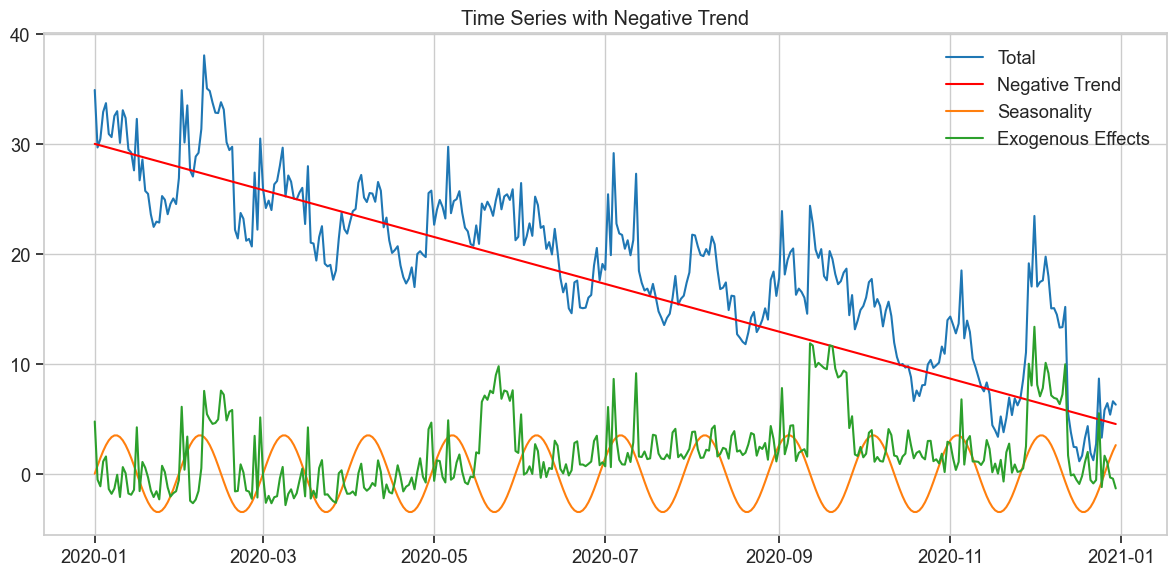

In [11]:
# Cell 12: Dataset with Negative Trend

# Parameters - negative trend
trend_slope = -0.07  # Downward trend
seasonal_amplitude = 3.5  # Moderate seasonality
seasonal_period = 30
noise_std = 0.45

# Generate base components
initial_level = 30  # Higher starting point to avoid negative values
trend = initial_level + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables
temperature = get_temperature(amplitude=9, phase_shift=np.pi/6)
is_promotion = get_promotions(num_promotions=4, avg_duration=14)

# Exogenous effects
temp_effect = -0.22 * (temperature - 15)
weekend_effect = 2.2 * is_weekend
holiday_effect = 5.5 * is_holiday
promotion_effect = 7.5 * is_promotion

# Combine all effects
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame
df_negative_trend = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)


# Display the first few rows
print("Negative trend dataset:")
df_negative_trend.head()

# Quick visualization
plt.figure(figsize=(12, 6))
plt.plot(df_negative_trend.index, df_negative_trend['value'], label='Total')
plt.plot(df_negative_trend.index, df_negative_trend['trend'], label='Negative Trend', color='red')
plt.plot(df_negative_trend.index, df_negative_trend['seasonality'], label='Seasonality')
plt.plot(df_negative_trend.index, df_negative_trend['exog_effects'], label='Exogenous Effects')

plt.title('Time Series with Negative Trend')
plt.legend()
plt.tight_layout()
plt.show()

## Extended Dataset (5 yr) Creation

In [12]:
# Section 1: Create Extended Datasets (5 Years Each)
import pandas as pd
import numpy as np

def extend_dataset(original_df, num_repeats=5, dataset_name=""):
    """
    Extend a dataset by repeating it multiple times with continuous time index
    
    Args:
        original_df: Original dataframe with one year of data
        num_repeats: Number of times to repeat the dataset
        dataset_name: Name for debugging/logging
    
    Returns:
        Extended dataframe with continuous time index
    """
    print(f"Extending {dataset_name} dataset...")
    
    # Store original columns (excluding time index)
    data_columns = original_df.columns.tolist()
    
    # Initialize lists to store extended data
    extended_data = {col: [] for col in data_columns}
    extended_dates = []
    
    # Get the original date range info
    original_start = original_df.index[0]
    original_end = original_df.index[-1]
    days_in_original = len(original_df)
    
    print(f"  Original dataset: {days_in_original} days from {original_start} to {original_end}")
    
    # Repeat the dataset
    for repeat_idx in range(num_repeats):
        # Calculate start date for this repetition
        if repeat_idx == 0:
            repeat_start = original_start
        else:
            # Start the next year immediately after the previous year ends
            repeat_start = extended_dates[-1] + pd.Timedelta(days=1)
        
        # Create date range for this repetition
        repeat_dates = pd.date_range(
            start=repeat_start, 
            periods=days_in_original, 
            freq='D'
        )
        
        # Add dates to extended list
        extended_dates.extend(repeat_dates)
        
        # Add data for each column
        for col in data_columns:
            extended_data[col].extend(original_df[col].values)
        
        print(f"  Added repetition {repeat_idx + 1}: {repeat_dates[0]} to {repeat_dates[-1]}")
    
    # Create extended dataframe
    extended_df = pd.DataFrame(extended_data, index=extended_dates)
    
    print(f"  Final extended dataset: {len(extended_df)} days from {extended_df.index[0]} to {extended_df.index[-1]}")
    print()
    
    return extended_df

# Create extended versions of all 10 datasets
print("Creating extended datasets (5 years each)...")
print("=" * 60)

# Assuming all original datasets exist with these names:
dataset_names = [
    'df_original',
    'df_strong_trend', 
    'df_strong_seasonality',
    'df_changing_trend',
    'df_exogenous_dominant',
    'df_high_noise',
    'df_gbm',
    'df_heteroskedastic',
    'df_regimes',
    'df_negative_trend'
]

# Dictionary to store extended datasets
extended_datasets = {}

# Create extended datasets
for dataset_name in dataset_names:
    # Get the original dataset
    try:
        original_df = globals()[dataset_name]
        
        # Create extended version
        extended_name = dataset_name.replace('df_', '') + '_long'
        extended_df = extend_dataset(original_df, num_repeats=5, dataset_name=dataset_name)
        
        # Store in dictionary and global namespace
        extended_datasets[extended_name] = extended_df
        globals()[extended_name] = extended_df
        
        print(f"✅ Created {extended_name}: {len(extended_df)} days")
        
    except NameError:
        print(f"❌ Dataset {dataset_name} not found. Skipping...")
        continue

print("\n" + "=" * 60)
print(f"Successfully created {len(extended_datasets)} extended datasets")
print("Extended dataset names:")
for name in extended_datasets.keys():
    print(f"  - {name}")

# Verify one extended dataset structure
if extended_datasets:
    sample_name = list(extended_datasets.keys())[0]
    sample_df = extended_datasets[sample_name]
    print(f"\nSample dataset structure ({sample_name}):")
    print(f"  Shape: {sample_df.shape}")
    print(f"  Columns: {list(sample_df.columns)}")
    print(f"  Date range: {sample_df.index[0]} to {sample_df.index[-1]}")
    print(f"  First few rows:")
    print(sample_df.head())

Creating extended datasets (5 years each)...
Extending df_original dataset...
  Original dataset: 365 days from 2020-01-01 00:00:00 to 2020-12-30 00:00:00
  Added repetition 1: 2020-01-01 00:00:00 to 2020-12-30 00:00:00
  Added repetition 2: 2020-12-31 00:00:00 to 2021-12-30 00:00:00
  Added repetition 3: 2021-12-31 00:00:00 to 2022-12-30 00:00:00
  Added repetition 4: 2022-12-31 00:00:00 to 2023-12-30 00:00:00
  Added repetition 5: 2023-12-31 00:00:00 to 2024-12-29 00:00:00
  Final extended dataset: 1825 days from 2020-01-01 00:00:00 to 2024-12-29 00:00:00

✅ Created original_long: 1825 days
Extending df_strong_trend dataset...
  Original dataset: 365 days from 2020-01-01 00:00:00 to 2020-12-30 00:00:00
  Added repetition 1: 2020-01-01 00:00:00 to 2020-12-30 00:00:00
  Added repetition 2: 2020-12-31 00:00:00 to 2021-12-30 00:00:00
  Added repetition 3: 2021-12-31 00:00:00 to 2022-12-30 00:00:00
  Added repetition 4: 2022-12-31 00:00:00 to 2023-12-30 00:00:00
  Added repetition 5: 2023

## Model Testing Infrastructure

In [13]:
# Section 2: Model Testing Infrastructure
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import TensorDataset, DataLoader, Dataset
import time
import warnings
warnings.filterwarnings('ignore')

# Import models
from models.lstm import LSTMModel
from models.nbeatsx_v7 import NBEATSx
from models.deepar_v3 import DeepARModel
from models.tft_v3 import TemporalFusionTransformer

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Common parameters for all models
SEQUENCE_LENGTH = 30
FORECAST_HORIZON = 1  # Single-step forecasting
TEST_RATIO = 0.2
BATCH_SIZE = 32
NUM_EPOCHS = 30  # Reduced for faster testing across many datasets
LEARNING_RATE = 0.001

# Helper function to create sequences
def create_sequences(data, seq_length):
    """Create input-output sequences for time series prediction"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Custom dataset for DeepAR
class TimeSeriesDataset(Dataset):
    def __init__(self, df, seq_length, pred_length, target_col='value', time_cols=None):
        self.seq_length = seq_length
        self.pred_length = pred_length
        self.target_col = target_col
        
        # Scale the target variable
        self.target_scaler = StandardScaler()
        target_data = df[target_col].values.reshape(-1, 1)
        self.scaled_target = self.target_scaler.fit_transform(target_data)
        
        # Process time features if provided
        if time_cols:
            time_features = df[time_cols].values
            self.time_scaler = StandardScaler()
            self.scaled_time_features = self.time_scaler.fit_transform(time_features)
            self.num_time_features = len(time_cols)
        else:
            self.scaled_time_features = None
            self.num_time_features = 0
        
        # Store indices for slicing
        total_length = len(df)
        self.indices = []
        for i in range(total_length - seq_length - pred_length + 1):
            self.indices.append((i, i + seq_length + pred_length))
    
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        start_idx, end_idx = self.indices[idx]
        
        # Get target sequence
        target_seq = self.scaled_target[start_idx:end_idx].squeeze()
        
        # Get time features if available
        if self.scaled_time_features is not None:
            time_feat_seq = self.scaled_time_features[start_idx:end_idx]
            time_feat_tensor = torch.FloatTensor(time_feat_seq)
        else:
            time_feat_tensor = None
        
        return {
            'y': torch.FloatTensor(target_seq),
            'time_features': time_feat_tensor,
            'static_features': None
        }

# Custom collate function for DeepAR
def custom_collate(batch):
    elem = batch[0]
    result = {}
    
    for key in elem:
        if all(batch[i][key] is not None for i in range(len(batch))):
            result[key] = torch.stack([batch[i][key] for i in range(len(batch))])
        else:
            result[key] = None
            
    return result

# TFT Dataset class
class TFTDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, static_features, time_features):
        self.X = X
        self.y = y
        self.static = static_features
        self.time = time_features
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return {
            'X': self.X[idx],
            'y': self.y[idx],
            'static': self.static[idx],
            'time': self.time[idx]
        }

def prepare_tft_batch(batch):
    """Prepare batch for TFT model"""
    X = batch['X']
    static = batch['static']
    time = batch['time']
    targets = batch['y']
    
    # Prepare encoder inputs
    encoder_inputs = [X]
    
    # Prepare decoder inputs
    decoder_inputs = []
    for i in range(time.shape[1]):
        feature = time[:, i:i+1].unsqueeze(1)
        decoder_inputs.append(feature)
    
    # Prepare static inputs
    static_inputs = []
    for i in range(static.shape[1]):
        feature = static[:, i:i+1]
        static_inputs.append(feature)
    
    return {
        'encoder_inputs': encoder_inputs,
        'decoder_inputs': decoder_inputs,
        'static_inputs': static_inputs,
        'targets': targets
    }

print("✅ Model testing infrastructure ready")
print("📊 Test Parameters:")
print(f"  - Sequence Length: {SEQUENCE_LENGTH}")
print(f"  - Forecast Horizon: {FORECAST_HORIZON}")
print(f"  - Test Ratio: {TEST_RATIO}")
print(f"  - Batch Size: {BATCH_SIZE}")
print(f"  - Epochs: {NUM_EPOCHS}")
print(f"  - Learning Rate: {LEARNING_RATE}")

✅ Model testing infrastructure ready
📊 Test Parameters:
  - Sequence Length: 30
  - Forecast Horizon: 1
  - Test Ratio: 0.2
  - Batch Size: 32
  - Epochs: 30
  - Learning Rate: 0.001


## LSTM Single Step Testing

In [14]:
# Section 3: LSTM Testing Function

def test_lstm_on_dataset(df, dataset_name):
    """
    Test LSTM model on a given dataset
    
    Args:
        df: DataFrame with time series data
        dataset_name: Name of the dataset for plotting titles
    
    Returns:
        dict: Results dictionary with metrics and predictions
    """
    print(f"\n🔄 Testing LSTM on {dataset_name}...")
    
    # Scale the data
    scaler = MinMaxScaler()
    values_scaled = scaler.fit_transform(df[['value']].values)
    
    # Create sequences
    X, y = create_sequences(values_scaled, SEQUENCE_LENGTH)
    
    # Split into train and test sets
    test_size = int(len(X) * TEST_RATIO)
    train_size = len(X) - test_size
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Convert to PyTorch tensors
    X_train = torch.FloatTensor(X_train)
    y_train = torch.FloatTensor(y_train)
    X_test = torch.FloatTensor(X_test)
    y_test = torch.FloatTensor(y_test)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Initialize model
    model = LSTMModel(input_size=1, hidden_size=64, num_layers=2)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # Training
    train_losses = []
    start_time = time.time()
    
    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0
        
        for inputs, targets in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
    
    training_time = time.time() - start_time
    
    # Evaluation
    model.eval()
    predictions = []
    actuals = []
    inference_start = time.time()
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.append(outputs.numpy())
            actuals.append(targets.numpy())
    
    inference_time = time.time() - inference_start
    
    # Concatenate and inverse transform
    predictions = np.concatenate(predictions)
    actuals = np.concatenate(actuals)
    
    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)
    
    # Calculate metrics
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    
    # Print metrics
    print(f"📈 LSTM Results for {dataset_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  Training time: {training_time:.2f}s")
    print(f"  Inference time: {inference_time:.4f}s")
    
    # Plot results
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: Training loss
    axes[0].plot(train_losses)
    axes[0].set_title(f'LSTM Training Loss - {dataset_name}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)
    
    # Plot 2: Predictions vs actuals in context
    axes[1].plot(df.index, df['value'], label='Full Dataset', alpha=0.3)
    pred_dates = df.index[SEQUENCE_LENGTH + train_size:SEQUENCE_LENGTH + train_size + len(predictions)]
    axes[1].plot(pred_dates, predictions, label='LSTM Predictions', color='red', linewidth=2)
    axes[1].plot(pred_dates, actuals, label='Actual', color='green', linewidth=1)
    axes[1].set_title(f'LSTM Predictions - {dataset_name}')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': 'LSTM',
        'dataset': dataset_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'training_time': training_time,
        'inference_time': inference_time,
        'train_losses': train_losses
    }

print("✅ LSTM testing function ready")

✅ LSTM testing function ready


## NBEATsX V7 Test Single Step

In [15]:
# Section 4: NBEATSx Testing Function

def test_nbeatsx_on_dataset(df, dataset_name):
    """
    Test NBEATSx model on a given dataset
    
    Args:
        df: DataFrame with time series data
        dataset_name: Name of the dataset for plotting titles
    
    Returns:
        dict: Results dictionary with metrics and predictions
    """
    print(f"\n🔄 Testing NBEATSx on {dataset_name}...")
    
    # Define exogenous columns
    exog_cols = ['temperature', 'is_weekend', 'is_holiday', 'is_promotion',
                 'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
                 'day_of_month_cos', 'month_sin', 'month_cos']
    
    # Scale target and exogenous variables
    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(df[['value']].values)
    
    scaler_x = StandardScaler()
    exog_scaled = scaler_x.fit_transform(df[exog_cols].values)
    
    # Create sequences for NBEATSx
    def create_nbeatsx_sequences(data, exog_data, lookback, horizon=1):
        X, y, exog = [], [], []
        for i in range(len(data) - lookback - horizon + 1):
            X.append(data[i:i+lookback, 0])
            y.append(data[i+lookback, 0])
            exog.append(exog_data[i:i+lookback+1])
        return np.array(X), np.array(y), np.array(exog)
    
    X, y, exog = create_nbeatsx_sequences(y_scaled, exog_scaled, SEQUENCE_LENGTH, FORECAST_HORIZON)
    
    # Split into train and test sets
    test_size = int(len(X) * TEST_RATIO)
    train_size = len(X) - test_size
    
    X_train = torch.FloatTensor(X[:train_size])
    y_train = torch.FloatTensor(y[:train_size])
    exog_train = torch.FloatTensor(exog[:train_size])
    
    X_test = torch.FloatTensor(X[train_size:])
    y_test = torch.FloatTensor(y[train_size:])
    exog_test = torch.FloatTensor(exog[train_size:])
    
    # Create data loaders
    train_dataset = TensorDataset(X_train, y_train, exog_train)
    test_dataset = TensorDataset(X_test, y_test, exog_test)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Initialize NBEATSx model
    exog_channels = exog.shape[2]
    model = NBEATSx(
        input_size=SEQUENCE_LENGTH,
        forecast_size=FORECAST_HORIZON,
        exog_channels=exog_channels,
        stack_types=['trend', 'seasonality', 'generic'],
        num_blocks_per_stack=[2, 2, 1],
        hidden_units=128,
        layers=3,
        basis_kwargs={'degree': 3, 'harmonics': 5, 'tcn_levels': 3, 'tcn_kernel_size': 3},
        dropout=0.1,
        exog_mode='tcn'
    )
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # Training
    train_losses = []
    start_time = time.time()
    
    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0
        
        for inputs, targets, exog_batch in train_loader:
            outputs = model(inputs, exog_batch)
            outputs = outputs.squeeze()
            loss = criterion(outputs, targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
    
    training_time = time.time() - start_time
    
    # Evaluation
    model.eval()
    predictions = []
    actuals = []
    inference_start = time.time()
    
    with torch.no_grad():
        for inputs, targets, exog_batch in test_loader:
            outputs = model(inputs, exog_batch)
            predictions.append(outputs.squeeze().numpy())
            actuals.append(targets.numpy())
    
    inference_time = time.time() - inference_start
    
    # Concatenate and inverse transform
    predictions = np.concatenate(predictions).reshape(-1, 1)
    actuals = np.concatenate(actuals).reshape(-1, 1)
    
    predictions_orig = scaler_y.inverse_transform(predictions).flatten()
    actuals_orig = scaler_y.inverse_transform(actuals).flatten()
    
    # Calculate metrics
    mse = mean_squared_error(actuals_orig, predictions_orig)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals_orig, predictions_orig)
    
    # Print metrics
    print(f"📈 NBEATSx Results for {dataset_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  Training time: {training_time:.2f}s")
    print(f"  Inference time: {inference_time:.4f}s")
    
    # Plot results
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: Training loss
    axes[0].plot(train_losses)
    axes[0].set_title(f'NBEATSx Training Loss - {dataset_name}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)
    
    # Plot 2: Predictions vs actuals in context
    axes[1].plot(df.index, df['value'], label='Full Dataset', alpha=0.3)
    pred_dates = df.index[SEQUENCE_LENGTH + train_size:SEQUENCE_LENGTH + train_size + len(predictions_orig)]
    axes[1].plot(pred_dates, predictions_orig, label='NBEATSx Predictions', color='red', linewidth=2)
    axes[1].plot(pred_dates, actuals_orig, label='Actual', color='green', linewidth=1)
    axes[1].set_title(f'NBEATSx Predictions - {dataset_name}')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': 'NBEATSx',
        'dataset': dataset_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'training_time': training_time,
        'inference_time': inference_time,
        'train_losses': train_losses
    }

print("✅ NBEATSx testing function ready")

✅ NBEATSx testing function ready


## DeepAR V3 Single Step Test

In [17]:
# Section 5: DeepAR Testing Function

def test_deepar_on_dataset(df, dataset_name):
    """
    Test DeepAR model on a given dataset
    
    Args:
        df: DataFrame with time series data
        dataset_name: Name of the dataset for plotting titles
    
    Returns:
        dict: Results dictionary with metrics and predictions
    """
    print(f"\n🔄 Testing DeepAR on {dataset_name}...")
    
    # Define time feature columns
    time_feature_cols = [
        'temperature', 'day_of_week_sin', 'day_of_week_cos', 
        'day_of_month_sin', 'day_of_month_cos', 'month_sin', 'month_cos',
        'is_weekend', 'is_holiday', 'is_promotion'
    ]
    
    # Calculate split indices
    total_size = len(df) - SEQUENCE_LENGTH - FORECAST_HORIZON + 1
    test_size = int(total_size * TEST_RATIO)
    train_size = total_size - test_size
    
    # Create train and test dataframes
    train_end_idx = train_size + SEQUENCE_LENGTH + FORECAST_HORIZON - 1
    train_df = df.iloc[:train_end_idx+1]
    test_df = df.iloc[train_size:]
    
    # Create datasets
    train_dataset = TimeSeriesDataset(train_df, SEQUENCE_LENGTH, FORECAST_HORIZON, 
                                   target_col='value', time_cols=time_feature_cols)
    test_dataset = TimeSeriesDataset(test_df, SEQUENCE_LENGTH, FORECAST_HORIZON, 
                                 target_col='value', time_cols=time_feature_cols)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=custom_collate)
    
    # Initialize DeepAR model
    model_config = {
        'num_time_features': len(time_feature_cols),
        'num_static_features': 0,
        'embedding_dim': 32,
        'hidden_size': 64,
        'num_layers': 2,
        'dropout': 0.1,
        'likelihood': 'gaussian',
        'seq_len': SEQUENCE_LENGTH,
        'prediction_len': FORECAST_HORIZON
    }
    
    model = DeepARModel(**model_config)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # Training
    train_losses = []
    start_time = time.time()
    
    for epoch in range(NUM_EPOCHS):
        model.train()
        epoch_loss = 0.0
        batch_count = 0
        
        for batch in train_loader:
            y = batch['y']
            time_features = batch['time_features']
            
            optimizer.zero_grad()
            
            loss = model.loss(
                y=y,
                time_features=time_features,
                static_features=None
            )
            
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            batch_count += 1
        
        if batch_count > 0:
            avg_loss = epoch_loss / batch_count
            train_losses.append(avg_loss)
    
    training_time = time.time() - start_time
    
    # Evaluation
    model.eval()
    predictions = []
    actuals = []
    current_idx = train_size
    inference_start = time.time()
    
    with torch.no_grad():
        for batch in test_loader:
            y = batch['y']
            time_features = batch['time_features']
            
            outputs = model.forward(
                y=y[:, :SEQUENCE_LENGTH],
                time_features=time_features[:, :SEQUENCE_LENGTH] if time_features is not None else None,
                static_features=None,
                future_time_features=time_features[:, SEQUENCE_LENGTH:] if time_features is not None else None,
                training=False
            )
            
            pred_mean = outputs['mean'].detach().numpy()
            act = y[:, SEQUENCE_LENGTH:].detach().numpy()
            
            # For each instance in the batch
            for i in range(len(pred_mean)):
                predictions.append(pred_mean[i, 0])
                actuals.append(act[i, 0])
                current_idx += 1
    
    inference_time = time.time() - inference_start
    
    # Convert and inverse transform
    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)
    
    scaler = train_dataset.target_scaler
    predictions_original = scaler.inverse_transform(predictions).flatten()
    actuals_original = scaler.inverse_transform(actuals).flatten()
    
    # Calculate metrics
    mse = mean_squared_error(actuals_original, predictions_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals_original, predictions_original)
    
    # Print metrics
    print(f"📈 DeepAR Results for {dataset_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  Training time: {training_time:.2f}s")
    print(f"  Inference time: {inference_time:.4f}s")
    
    # Plot results
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: Training loss
    axes[0].plot(train_losses)
    axes[0].set_title(f'DeepAR Training Loss - {dataset_name}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)
    
    # Plot 2: Predictions vs actuals in context
    axes[1].plot(df.index, df['value'], label='Full Dataset', alpha=0.3)
    # Create prediction dates
    pred_start_idx = SEQUENCE_LENGTH + train_size
    pred_end_idx = pred_start_idx + len(predictions_original)
    pred_dates = df.index[pred_start_idx:pred_end_idx]
    axes[1].plot(pred_dates, predictions_original, label='DeepAR Predictions', color='red', linewidth=2)
    axes[1].plot(pred_dates, actuals_original, label='Actual', color='green', linewidth=1)
    axes[1].set_title(f'DeepAR Predictions - {dataset_name}')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': 'DeepAR',
        'dataset': dataset_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'training_time': training_time,
        'inference_time': inference_time,
        'train_losses': train_losses
    }

print("✅ DeepAR testing function ready")

✅ DeepAR testing function ready


## Temporal Fusion Transformer V3 Test Single Step

In [18]:
# Section 6: TFT Testing Function

def test_tft_on_dataset(df, dataset_name):
    """
    Test TFT model on a given dataset
    
    Args:
        df: DataFrame with time series data
        dataset_name: Name of the dataset for plotting titles
    
    Returns:
        dict: Results dictionary with metrics and predictions
    """
    print(f"\n🔄 Testing TFT on {dataset_name}...")
    
    # Define features
    time_features = [
        'temperature', 'day_of_week_sin', 'day_of_week_cos', 
        'day_of_month_sin', 'day_of_month_cos', 'month_sin', 'month_cos'
    ]
    static_features = ['is_weekend', 'is_holiday', 'is_promotion']
    
    # Scale the data
    scaler = MinMaxScaler()
    values_scaled = scaler.fit_transform(df[['value']].values)
    
    # Create sequences
    X, y = create_sequences(values_scaled, SEQUENCE_LENGTH)
    
    # Split into train and test sets
    test_size = int(len(X) * TEST_RATIO)
    train_size = len(X) - test_size
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Get corresponding static and time features
    train_indices = list(range(SEQUENCE_LENGTH, SEQUENCE_LENGTH + train_size))
    test_indices = list(range(SEQUENCE_LENGTH + train_size, SEQUENCE_LENGTH + train_size + test_size))
    
    train_static = df[static_features].iloc[train_indices].values
    test_static = df[static_features].iloc[test_indices].values
    train_time = df[time_features].iloc[train_indices].values
    test_time = df[time_features].iloc[test_indices].values
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test)
    
    train_static_tensor = torch.FloatTensor(train_static)
    test_static_tensor = torch.FloatTensor(test_static)
    train_time_tensor = torch.FloatTensor(train_time)
    test_time_tensor = torch.FloatTensor(test_time)
    
    # Create datasets
    train_dataset = TFTDataset(X_train_tensor, y_train_tensor, train_static_tensor, train_time_tensor)
    test_dataset = TFTDataset(X_test_tensor, y_test_tensor, test_static_tensor, test_time_tensor)
    
    # Create data loaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Initialize TFT model
    model = TemporalFusionTransformer(
        static_input_sizes=[1, 1, 1],  # Three static features
        encoder_input_sizes=[1],  # Target history
        decoder_input_sizes=[1] * len(time_features),  # Future time features
        hidden_dim=64,
        lstm_layers=2,
        dropout=0.1,
        num_heads=4,
        forecast_horizon=FORECAST_HORIZON,
        backcast_length=SEQUENCE_LENGTH,
        output_dim=1,
        quantiles=[0.1, 0.5, 0.9]
    )
    
    # Define loss function
    criterion = nn.MSELoss()
    
    def tft_loss(outputs, targets):
        predictions = outputs[:, 0, 0, 1]  # Use median prediction
        return criterion(predictions, targets.squeeze())
    
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # Training
    train_losses = []
    start_time = time.time()
    
    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0
        
        for batch in train_loader:
            tft_batch = prepare_tft_batch(batch)
            
            optimizer.zero_grad()
            
            outputs = model(
                static_inputs=tft_batch['static_inputs'],
                encoder_inputs=tft_batch['encoder_inputs'],
                decoder_inputs=tft_batch['decoder_inputs']
            )
            
            loss = tft_loss(outputs, tft_batch['targets'])
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
    
    training_time = time.time() - start_time
    
    # Evaluation
    model.eval()
    predictions = []
    actuals = []
    inference_start = time.time()
    
    with torch.no_grad():
        for batch in test_loader:
            tft_batch = prepare_tft_batch(batch)
            
            outputs = model(
                static_inputs=tft_batch['static_inputs'],
                encoder_inputs=tft_batch['encoder_inputs'],
                decoder_inputs=tft_batch['decoder_inputs']
            )
            
            # Get predictions (median)
            preds = outputs[:, 0, 0, 1].cpu().numpy()
            acts = tft_batch['targets'].cpu().numpy()
            
            predictions.append(preds)
            actuals.append(acts)
    
    inference_time = time.time() - inference_start
    
    # Concatenate and inverse transform
    predictions = np.concatenate(predictions).reshape(-1, 1)
    actuals = np.concatenate(actuals).reshape(-1, 1)
    
    predictions = scaler.inverse_transform(predictions).flatten()
    actuals = scaler.inverse_transform(actuals).flatten()
    
    # Calculate metrics
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    
    # Print metrics
    print(f"📈 TFT Results for {dataset_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  Training time: {training_time:.2f}s")
    print(f"  Inference time: {inference_time:.4f}s")
    
    # Plot results
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: Training loss
    axes[0].plot(train_losses)
    axes[0].set_title(f'TFT Training Loss - {dataset_name}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)
    
    # Plot 2: Predictions vs actuals in context
    axes[1].plot(df.index, df['value'], label='Full Dataset', alpha=0.3)
    pred_dates = df.index[SEQUENCE_LENGTH + train_size:SEQUENCE_LENGTH + train_size + len(predictions)]
    axes[1].plot(pred_dates, predictions, label='TFT Predictions', color='red', linewidth=2)
    axes[1].plot(pred_dates, actuals, label='Actual', color='green', linewidth=1)
    axes[1].set_title(f'TFT Predictions - {dataset_name}')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': 'TFT',
        'dataset': dataset_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'training_time': training_time,
        'inference_time': inference_time,
        'train_losses': train_losses
    }

print("✅ TFT testing function ready")

✅ TFT testing function ready


## Main Testing Loop ##

In [20]:
# Section 7: Main Testing Loop - Run All Models on All Datasets

def run_comprehensive_testing():
    """
    Run all 4 models on all 10 extended datasets
    This will generate 40 loss plots and 40 prediction plots (80 total)
    """
    
    # Define the extended dataset names
    extended_dataset_names = [
        'original_long',
        'strong_trend_long', 
        'strong_seasonality_long',
        'changing_trend_long',
        'exogenous_dominant_long',
        'high_noise_long',
        'gbm_long',
        'heteroskedastic_long',
        'regimes_long',
        'negative_trend_long'
    ]
    
    # Define testing functions for each model
    model_functions = {
        'LSTM': test_lstm_on_dataset,
        'NBEATSx': test_nbeatsx_on_dataset,
        'DeepAR': test_deepar_on_dataset,
        'TFT': test_tft_on_dataset
    }
    
    # Store all results for summary
    all_results = []
    
    print("🚀 Starting Comprehensive Model Testing")
    print("=" * 80)
    print(f"📊 Testing {len(model_functions)} models on {len(extended_dataset_names)} datasets")
    print(f"🎯 Total tests: {len(model_functions) * len(extended_dataset_names)} = 40 tests")
    print(f"📈 Total plots: 80 (40 loss + 40 prediction plots)")
    print("=" * 80)
    
    # Main testing loop
    total_tests = len(model_functions) * len(extended_dataset_names)
    current_test = 0
    
    for dataset_name in extended_dataset_names:
        print(f"\n🔍 DATASET: {dataset_name.upper()}")
        print("-" * 50)
        
        # Check if dataset exists
        if dataset_name not in globals():
            print(f"❌ Dataset {dataset_name} not found. Skipping...")
            continue
            
        df = globals()[dataset_name]
        print(f"📋 Dataset info: {len(df)} days from {df.index[0]} to {df.index[-1]}")
        
        # Test each model on this dataset
        for model_name, test_function in model_functions.items():
            current_test += 1
            print(f"\n🔄 [{current_test}/{total_tests}] Testing {model_name} on {dataset_name}")
            
            try:
                # Set random seeds for reproducibility
                torch.manual_seed(42)
                np.random.seed(42)
                
                # Run the test
                result = test_function(df, f"{dataset_name} ({model_name})")
                all_results.append(result)
                
                print(f"✅ [{current_test}/{total_tests}] {model_name} on {dataset_name} completed")
                
            except Exception as e:
                print(f"❌ [{current_test}/{total_tests}] {model_name} on {dataset_name} failed: {str(e)}")
                continue
        
        print(f"✅ Completed all models for {dataset_name}")
    
    print("\n" + "=" * 80)
    print("🎉 COMPREHENSIVE TESTING COMPLETED!")
    print("=" * 80)
    
    # Summary statistics
    print(f"📊 Total successful tests: {len(all_results)}")
    print(f"📈 Total plots generated: {len(all_results) * 2}")
    
    if all_results:
        print("\n📋 SUMMARY OF ALL RESULTS:")
        print("-" * 80)
        
        # Group results by model
        model_summaries = {}
        for result in all_results:
            model = result['model']
            if model not in model_summaries:
                model_summaries[model] = []
            model_summaries[model].append(result)
        
        # Print summary for each model
        for model_name, results in model_summaries.items():
            print(f"\n🤖 {model_name} SUMMARY:")
            print(f"  Tests completed: {len(results)}")
            
            if results:
                mse_values = [r['mse'] for r in results]
                mae_values = [r['mae'] for r in results]
                training_times = [r['training_time'] for r in results]
                
                print(f"  MSE - Mean: {np.mean(mse_values):.4f}, Std: {np.std(mse_values):.4f}")
                print(f"  MAE - Mean: {np.mean(mae_values):.4f}, Std: {np.std(mae_values):.4f}")
                print(f"  Training Time - Mean: {np.mean(training_times):.2f}s, Std: {np.std(training_times):.2f}s")
                
                print(f"  Datasets tested:")
                for r in results:
                    print(f"    - {r['dataset']}: MSE={r['mse']:.4f}, MAE={r['mae']:.4f}")
    
    print("\n🏁 Testing complete! All plots have been generated above.")
    return all_results

# Instructions for running
print("🎯 READY TO RUN COMPREHENSIVE TESTING")
print("=" * 50)
print("To start the comprehensive testing, run:")
print("results = run_comprehensive_testing()")
print("")
print("⚠️  WARNING: This will generate 80 plots and take significant time!")
print("📝 Consider running in sections if needed.")
print("💡 All results will be stored and summarized at the end.")

🎯 READY TO RUN COMPREHENSIVE TESTING
To start the comprehensive testing, run:
results = run_comprehensive_testing()

⚠️  WARNING: This will generate 80 plots and take significant time!
📝 Consider running in sections if needed.
💡 All results will be stored and summarized at the end.


In [ ]:
results = run_comprehensive_testing()